![](https://i.imgur.com/JsMvGnP.png)

## Projeto - Classificação

## 1. Considerações iniciais

Neste notebook vamos praticar a construção de um modelo de Machine Learning. Mais especificamente, iremos utilizar um algoritmo para realizar um processo de classificação. Propositalmente, evitaremos adentrar em algoritmos e explicações mais complexas, pois o foco é percorrer o fluxo do Aprendizado de Máquina por inteiro, ou o máximo dele.

### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes de um serviço que interrompe suas assinaturas dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [7]:
url = "https://raw.githubusercontent.com/Fmarcelneves/br-classification-project/master/Churn_Modelling.csv"
churn = pd.read_csv(url)
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [20]:
y = churn['Exited']
X = churn.drop('Exited',axis = 1)

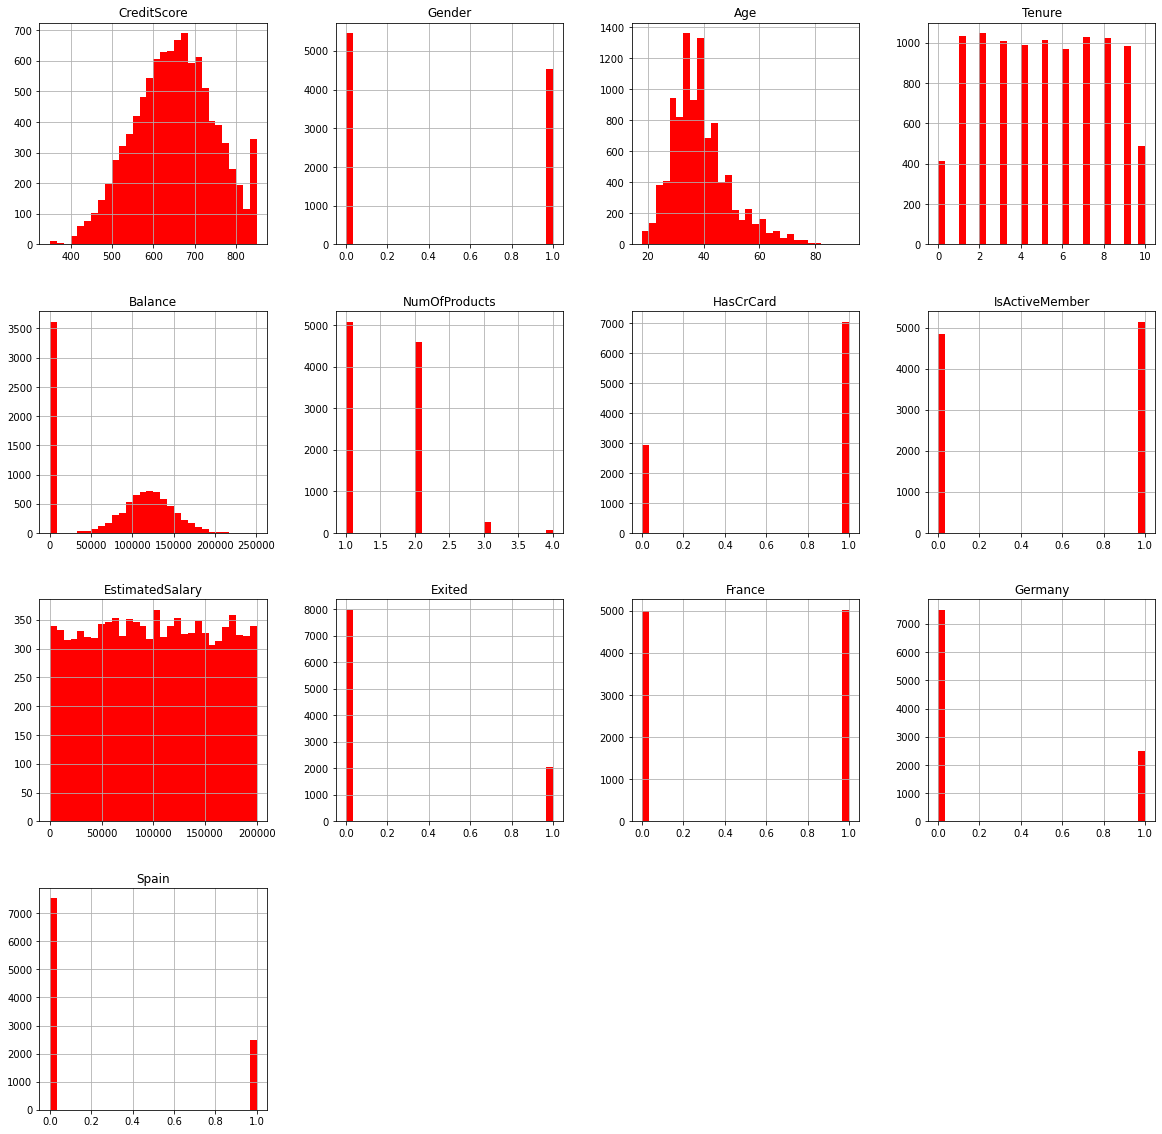

In [22]:
churn.hist(bins=30, figsize=(20, 20), color = 'r');

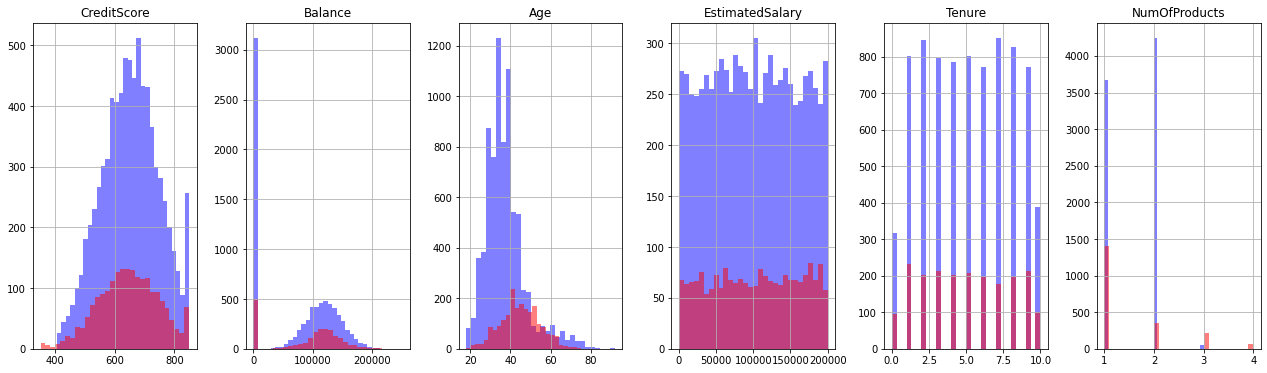

In [25]:
churn['Exited_cat']=churn['Exited'].replace([0,1],['Não','Sim'])
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure', 'NumOfProducts']
fig, ax = plt.subplots(1, 6, figsize=(22, 6));
churn[churn.Exited_cat == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
churn[churn.Exited_cat == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

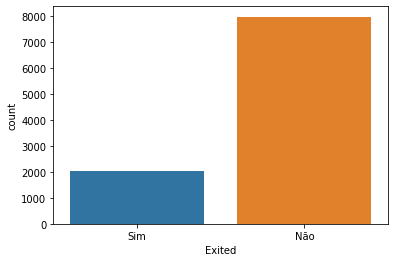

In [27]:
churn['Exited']=churn['Exited'].replace([0,1],['Não','Sim'])
sns.countplot(data=churn,x='Exited');

In [ ]:
#Sexo em relação a variável churn


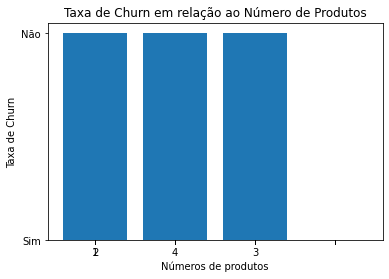

In [32]:
x=churn['NumOfProducts']
y=churn['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Número de Produtos');
plt.xlabel('Números de produtos');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (1,2,3,4));

Exited
Não    72745.296779
Sim    91108.539337
Name: Balance, dtype: float64

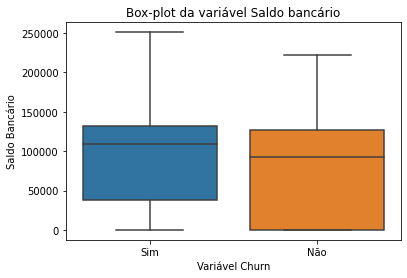

In [33]:
sns.boxplot(x="Exited", y="Balance", data=churn);
plt.title('Box-plot da variável Saldo bancário');
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');
churn.groupby(['Exited'])['Balance'].mean()

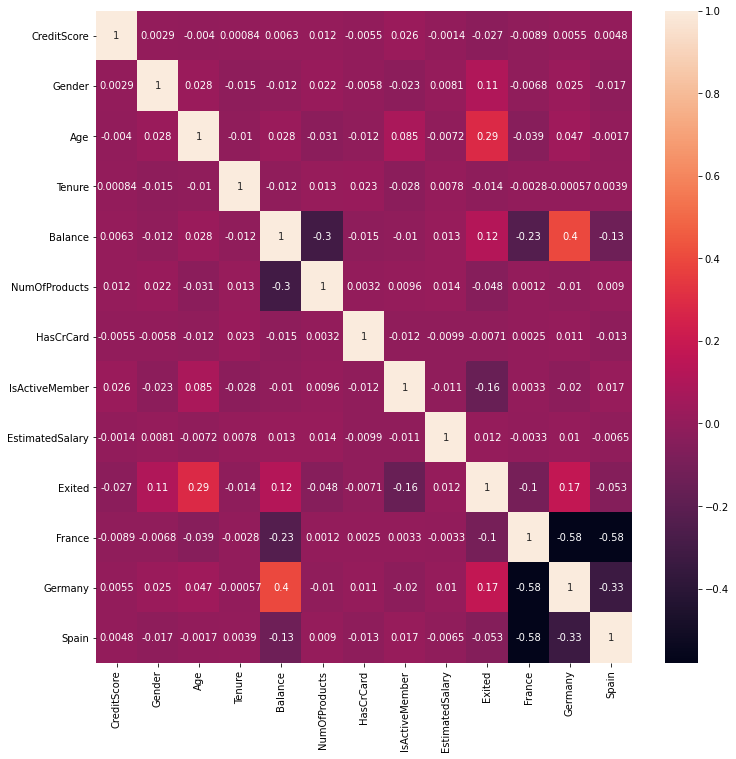

In [19]:
correlations = churn.corr()
f, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlations, annot = True);

### 3.2 Preparação e limpeza dos dados

In [10]:
churn.set_index('CustomerId', inplace=True)
churn.drop(columns=['RowNumber', 'Surname'], inplace=True)

In [11]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
churn.shape

(10000, 11)

In [13]:
churn.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
churn['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [15]:
churn['Gender']=churn['Gender'].apply(lambda x:1 if x=='Female' else 0) # Note here that unlike the other column, the keyword is "Female" not "Yes", however it is of course still binary class.
# Let's again print out our 10 first rows to see what the data now looks like.
churn.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,1,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,1,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,1,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
15574012,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1
15592531,822,France,0,50,7,0.00,2,1,1,10062.80,0
15656148,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1
15792365,501,France,0,44,4,142051.07,2,0,1,74940.50,0


In [16]:
churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [17]:
for x in churn['Geography'].value_counts().keys(): 
      churn[x]=churn['Geography'].apply(lambda d: 1 if d==x else 0)
churn.drop(columns=['Geography'], inplace=True)
churn.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
CustomerId,,,,,,,,,,,,,
15634602,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
15647311,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
15619304,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
15701354,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
15737888,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
15574012,645,0,44,8,113755.78,2,1,0,149756.71,1,0,0,1
15592531,822,0,50,7,0.00,2,1,1,10062.80,0,1,0,0
15656148,376,1,29,4,115046.74,4,1,0,119346.88,1,0,1,0
15792365,501,0,44,4,142051.07,2,0,1,74940.50,0,1,0,0


In [ ]:
# seu código

In [ ]:
# seu código

### 3.3 Seleção de atributos

In [ ]:
# seu código

In [ ]:
# seu código

### 3.4 Construção do modelo

In [ ]:
# seu código

In [ ]:
# seu código

### 3.5 Avaliação do modelo

In [ ]:
# seu código

In [ ]:
# seu código

### 3.4 Otimização do modelo

In [ ]:
# seu código

In [ ]:
# seu código

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. Você pode remover variáveis/atributos menos importantes, normalizar variáveis importantes, escolher outros algoritmos de aprendizagem supervisionada, etc. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.